# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification 

A classification is where you try to classify something as one thing or another. There are multiple types of classification 
* Binary Classification 
* Multiclass classification 
* Multilabel classification


## Creating data to view and fit

In [ ]:
from sklearn.datasets  import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise =0.03,
                    random_state = 42)


In [ ]:
# Check out the features 
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

 Our data is a little hard to understand right now, let's visualize it 

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],  "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


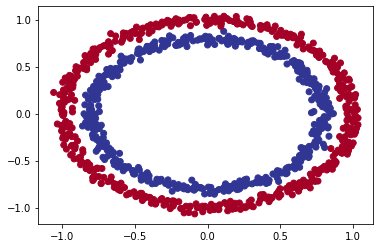

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y , cmap = plt.cm.RdYlBu);

## Input and Output shapes 

In [ ]:
# Check the shape of or features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're workign with 
len(X),len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels 
X[7], y[7]

(array([0.77151327, 0.14775959]), 1)

## Steps in modelling 

1. Get data ready
2. Build or pick a pretrained model 
3. Fit the model to the data and make a prediction 
4. Evaluate the model 
5. Improve through experimentation

In [ ]:
import tensorflow as tf

# set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

#2. Compile the model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3. Fit the model 
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 2s 4ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs = 100, verbose =0)

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

In [ ]:
# Let's try to add another layer and improve the model 
#set the seeed
tf.random.set_seed(42)

# 1. Create the model 
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs = 100, verbose = 0)

## Improving our Model

1. Create a model - 
    * Increase the number of layers or increase the number of hidden units within a layer. 
    * change the activation function 
2. Compiling a model 
    * Choose a different optimization function such as Adam instead of SGD 
3. Fitting a model - 
    * we can train our model for more epochs
    * we can get more/better data

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model 
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_3.compile( loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# 3. Fit the model 
model_3.fit(X, y, epochs = 100, verbose=0)


In [ ]:
# 4. Evaluate the model 
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5030


[0.6932135224342346, 0.503000020980835]

In [ ]:
model_3.predict(X)

array([[0.499563  ],
       [0.50479865],
       [0.5052    ],
       [0.50796354],
       [0.4912055 ],
       [0.50815946],
       [0.50741655],
       [0.498785  ],
       [0.4944707 ],
       [0.5096894 ],
       [0.4984355 ],
       [0.50549036],
       [0.5080612 ],
       [0.49484897],
       [0.4932115 ],
       [0.4933213 ],
       [0.5012889 ],
       [0.49339417],
       [0.5028803 ],
       [0.49672547],
       [0.50191593],
       [0.5099874 ],
       [0.49217087],
       [0.5000176 ],
       [0.5079762 ],
       [0.5058971 ],
       [0.5077409 ],
       [0.49601513],
       [0.49301028],
       [0.4940267 ],
       [0.49410006],
       [0.5098478 ],
       [0.50716263],
       [0.4967247 ],
       [0.49183062],
       [0.5094578 ],
       [0.50760734],
       [0.50485504],
       [0.49319726],
       [0.5030764 ],
       [0.4963069 ],
       [0.50708675],
       [0.49756885],
       [0.49524134],
       [0.49886537],
       [0.5011287 ],
       [0.49250528],
       [0.506

To visualize our model's predictions let's create a function `plot_decision_boundary()` 

This function will
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid 
* Plot the predictions as well as a line between zones (where each unique class falls)


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

doing binary classifcation...


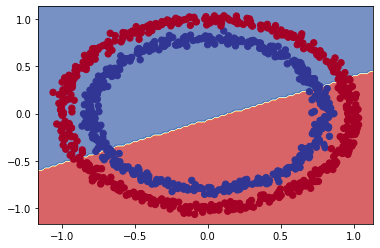

In [ ]:
# Check out the predictions our model is making 
plot_decision_boundary(model_3, X= X, y= y)

In [ ]:
# Let's see if our model can be used for a regression problem... 
tf.random.set_seed(42)

# Create some regression data 
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split our regression data into training and test sets
x_reg_train = X_regression[:150]
x_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model 
#model_3.fit(x_reg_train, y_reg_train, epochs = 100)

The model above is for a binary classification problem but now we're working on a regression problem, let's change the model to suit our data.

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model 
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(x_reg_train, axis =-1), y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

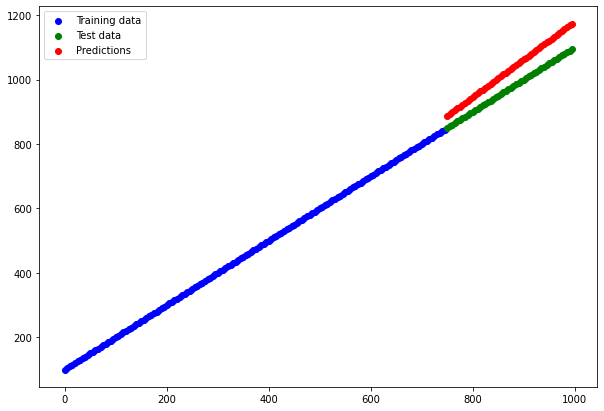

In [ ]:
# Make predictions with our trained model 
y_reg_pred = model_3.predict(x_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c='b', label="Training data")
plt.scatter(x_reg_test, y_reg_test, c='g', label ="Test data")
plt.scatter(x_reg_test, y_reg_pred, c ='r', label = "Predictions")
plt.legend();

## The missing piece: non-linearity 

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model 
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation="linear")
                            
])

# 2. Compile the model 
model_4.compile(loss ="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])

# 3. Fit the model 
history = model_4.fit(X, y, epochs = 100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

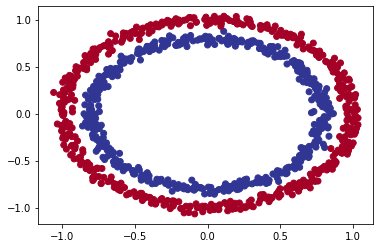

In [ ]:
# Check our data 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap =plt.cm.RdYlBu);


doing binary classifcation...


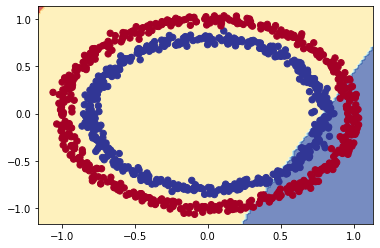

In [ ]:
# Check the decision boundary for our latest model 
plot_decision_boundary(model = model_4,
                       X=X,
                       y=y)

In [ ]:
# Try relu activation 

# set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

# 2. Compile the model 
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"]
)

# 3. Fit the model
history = model_5.fit(X, y, epochs =100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.6463 - accuracy: 0.4630
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5734 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8241 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7819 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7589 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7423 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7305 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7206 - accuracy: 0.4900
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7136 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7080 - accuracy: 0.4920
Epoch 11/

In [ ]:
# Time to replicate the multilayer model from the tensorflow playground

# set the random seed
tf.random.set_seed(42)

# 1. Create the model 
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation = "relu")                               
])

# 2. Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

# 3. Fit the model 
history = model_6.fit(X, y, epochs = 1000)

Epoch 1/1000
32/32 [==============================] - 1s 2ms/step - loss: 2.2290 - accuracy: 0.0550
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.9351 - accuracy: 0.0880
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.7775 - accuracy: 0.1130
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.7493 - accuracy: 0.1810
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.7304 - accuracy: 0.2350
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.7137 - accuracy: 0.2390
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.2270
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.2900
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.2490
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.2520

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0386 - accuracy: 0.4430


[0.03862984478473663, 0.4429999887943268]

doing multiclass classification...


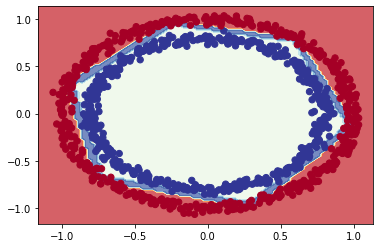

In [ ]:
plot_decision_boundary(model_6 , X, y)

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model 
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(1, activation = "sigmoid")                               
])

# 2. Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

# 3. Fit the model 
history = model_7.fit(X, y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/

In [ ]:
# evaluate 
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9910


[0.02100801281630993, 0.9909999966621399]

doing binary classifcation...


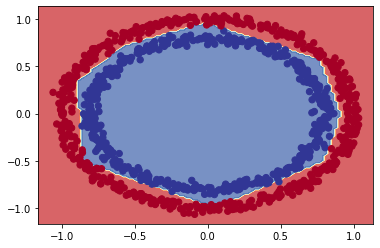

In [ ]:
# visualize
plot_decision_boundary(model_7, X, y)

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

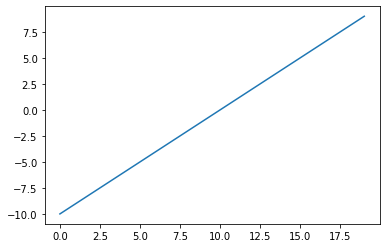

In [ ]:
# Visulaize our toy tensor
plt.plot(A);

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/(1+ exp(-x))
def sigmoid(x):
  return 1/(1+ tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

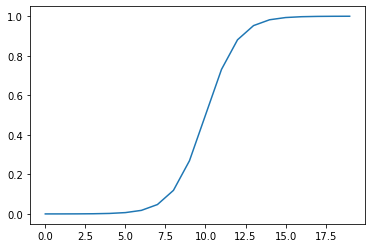

In [ ]:
# Plot our toy tensor transformed by sigmoid 
plt.plot(sigmoid(A));

In [ ]:
# Let's try and replicate the relu function 
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

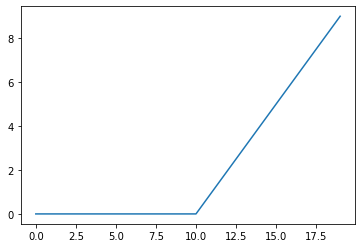

In [ ]:
plt.plot(relu(A));

## Evaluating and improving our classification 

So far we have been training and testing on the same dataset however, in machine learning this is a basically  a sin.
So let's try something new


In [ ]:
# Check how many exampels we have
len(X)

1000

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
# Split into train and test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the test model 

# set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model 7)
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation ="relu"),
                               tf.keras.layers.Dense(4, activation ="relu"),
                               tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model
model_8.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                metrics =["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs =100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6789 - accuracy: 0.5813
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.6550
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7225
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.9000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.8813
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9438
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 0.9775
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9812
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9663
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9850
Epoch 11/

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9800


[0.04575002193450928, 0.9800000190734863]

doing binary classifcation...


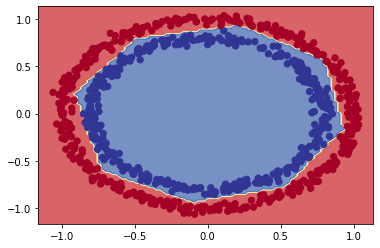

In [ ]:
plot_decision_boundary(model_8, X_train, y_train)

doing binary classifcation...
doing binary classifcation...


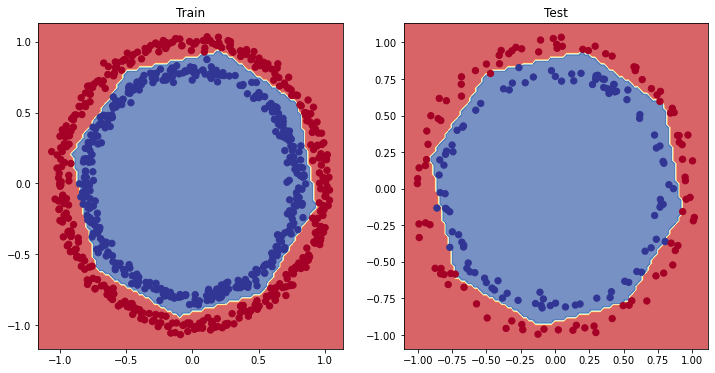

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8,  X_test, y_test)
plt.show()

## Plot the loss (training) curves

In [ ]:
history.history

{'accuracy': [0.581250011920929,
  0.6549999713897705,
  0.7225000262260437,
  0.8999999761581421,
  0.8812500238418579,
  0.9437500238418579,
  0.9775000214576721,
  0.981249988079071,
  0.9662500023841858,
  0.9850000143051147,
  0.956250011920929,
  0.9387500286102295,
  0.9587500095367432,
  0.9674999713897705,
  0.9662500023841858,
  0.9549999833106995,
  0.9775000214576721,
  0.9674999713897705,
  0.9787499904632568,
  0.96875,
  0.9337499737739563,
  0.9850000143051147,
  0.9925000071525574,
  0.9862499833106995,
  0.9825000166893005,
  0.9837499856948853,
  0.9900000095367432,
  0.9900000095367432,
  0.9912499785423279,
  0.981249988079071,
  0.981249988079071,
  0.9862499833106995,
  0.9925000071525574,
  0.9937499761581421,
  0.9937499761581421,
  0.9912499785423279,
  0.9975000023841858,
  0.9962499737739563,
  0.9850000143051147,
  0.9762499928474426,
  0.9787499904632568,
  0.9750000238418579,
  0.9537500143051147,
  0.9424999952316284,
  0.9837499856948853,
  0.9962499737

In [ ]:
# Conver the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.678865,0.58125
1,0.626802,0.65500
2,0.536134,0.72250
3,0.290215,0.90000
4,0.291235,0.88125
...,...,...
95,0.020063,0.99125
96,0.039931,0.98750
97,0.078292,0.97125
98,0.027469,0.99250


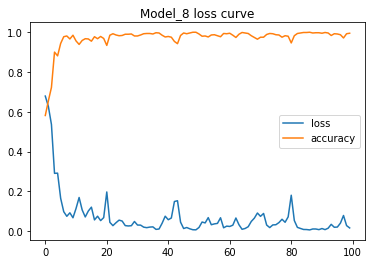

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curve");

**Note**: For many problems, the loss function going down means the model is improving. Especially as the metric is improving

## Finding the best learning rate 

To find the ideal learning rate, the learning rate where the loss decreases the most during training) we're going ot use the following steps:

*A learning rate **callback**:  - you can think of a callback as an extra peice of functionality, you can add to your model *while* it's training.

* Another model ( we could use the same one as above, but we're practicing)

In [ ]:
# set random seed 
tf.random.set_seed(42)

# Create a model 
model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(1, activation ="sigmoid")
])

# 2. Compile the model 
model_9.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model 
history_9 = model_9.fit(X_train, 
                        y_train,
                        epochs = 100,
                        callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

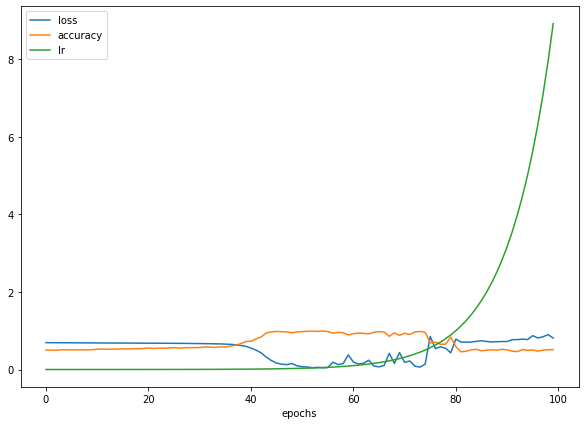

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel ="epochs");

In [ ]:
# Plot the learning rate versus the loss 
lrs = 1e-4 * ( 10 ** (tf.range(100) /20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'learning rate vs. loss')

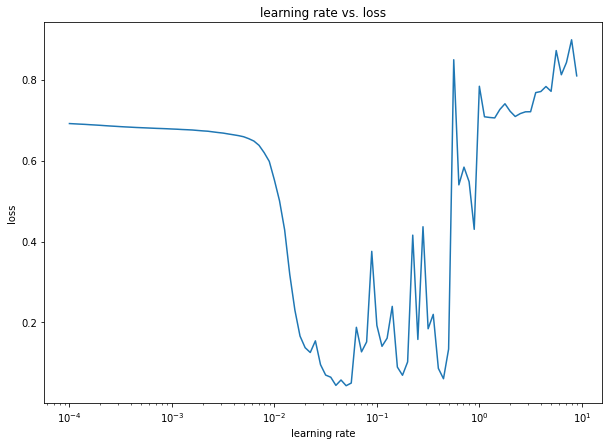

In [ ]:
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel("learning rate")
plt.ylabel('loss')
plt.title("learning rate vs. loss")

In [ ]:
# Example of other typical learning rate values
10 **0 , 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher *ideal* learning rate  using the same model 

# set the random seed 
tf.random.set_seed(42)

# Create the model 
model_10 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation ='relu'),
                                tf.keras.layers.Dense(4, activation ='relu'),
                                tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile the model
model_10.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                 metrics = ['accuracy'])

# fit the model
history_10 = model_10.fit(X_train, 
                          y_train,
                          epochs =20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9538
Epoch 11/20
25/25 [

In [ ]:
# Evaluate the model 
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9100


[0.21504619717597961, 0.9100000262260437]

In [ ]:
# Compare to model 8
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9800


[0.04575002193450928, 0.9800000190734863]

doing binary classifcation...
doing binary classifcation...


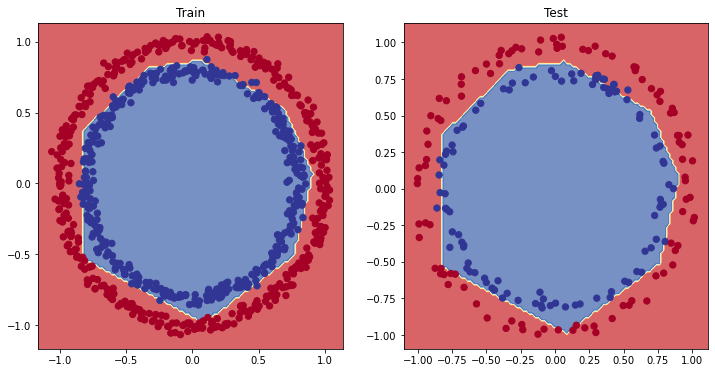

In [ ]:
# Plot the decision boundaries for the models 
plt.figure(figsize =(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X = X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X = X_test, y= y_test)
plt.show();

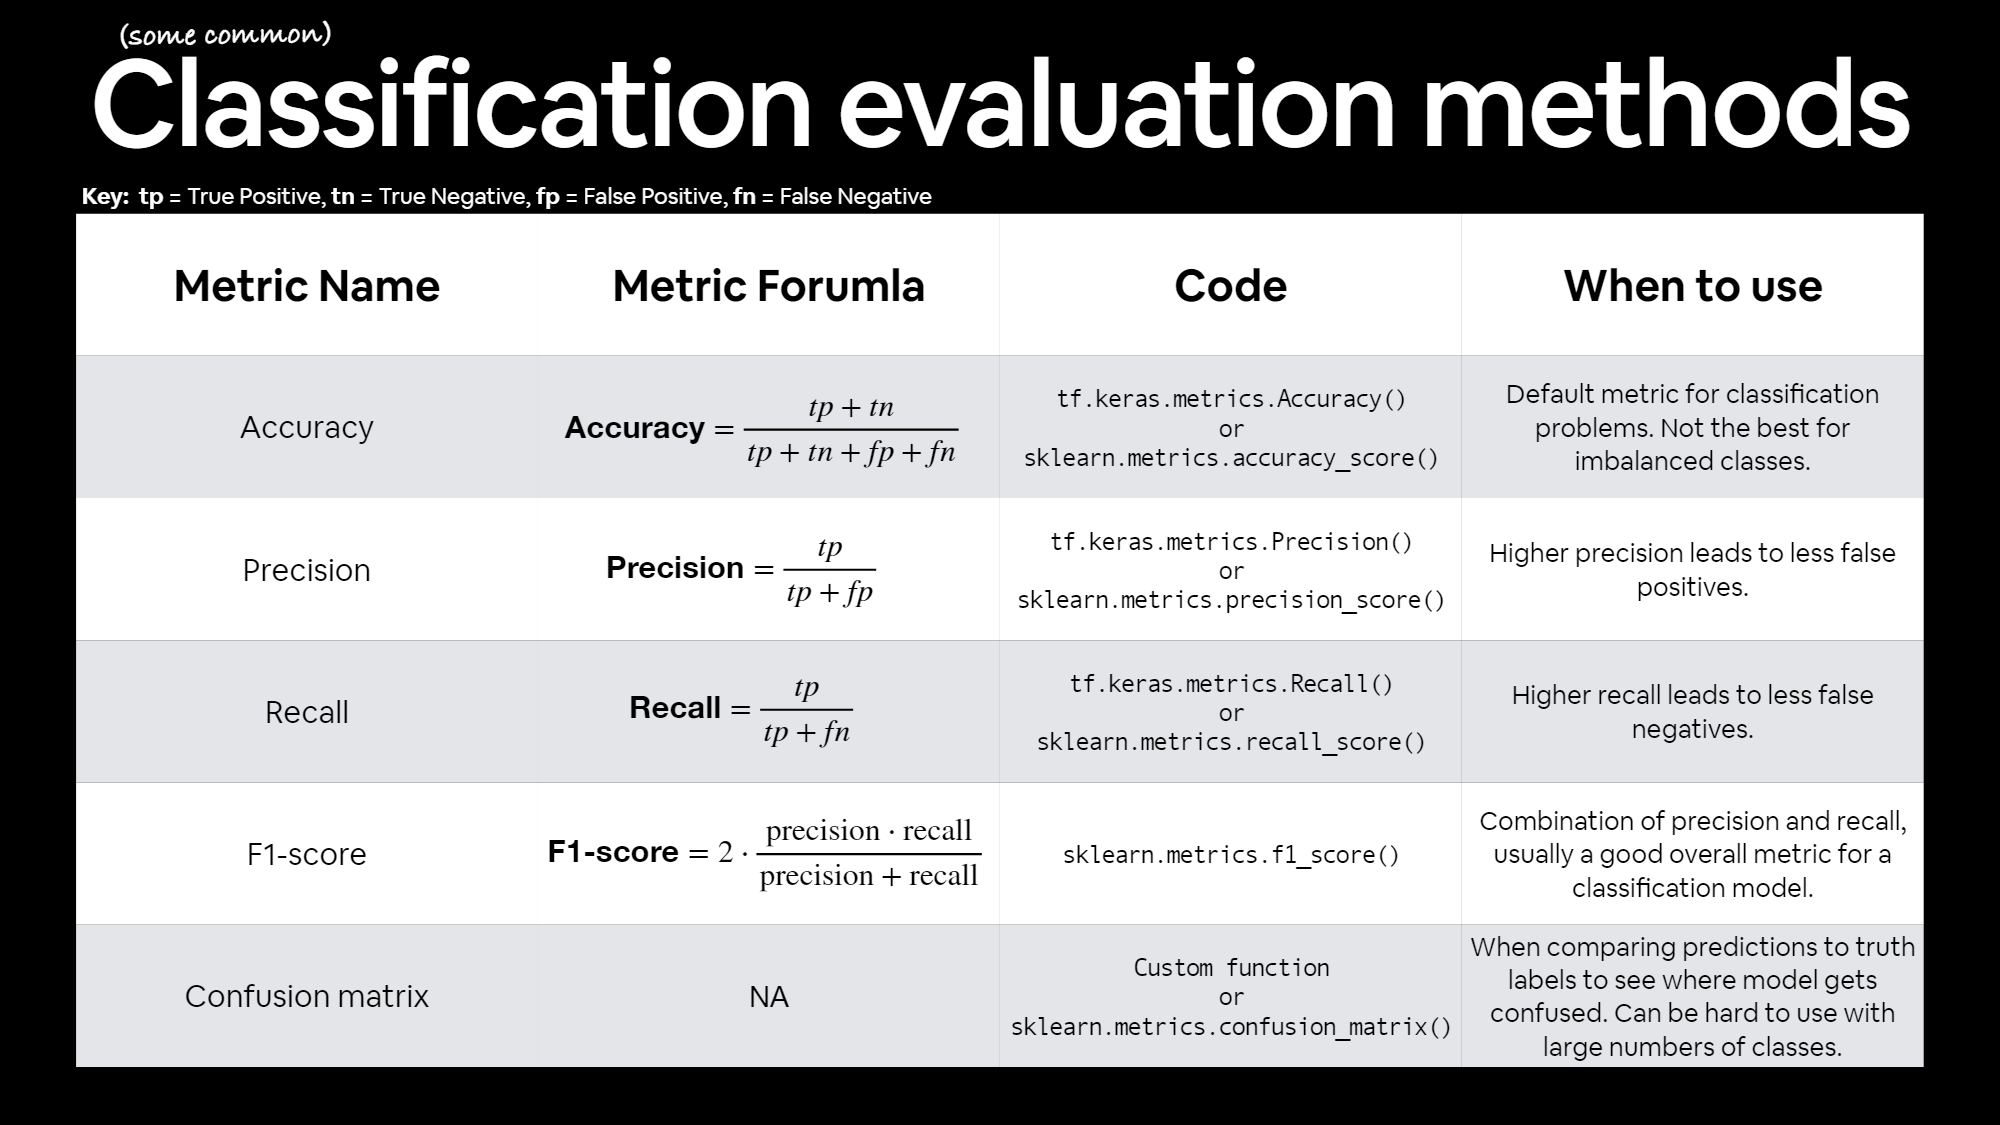

## More Classification evaluation methods 

Alongside visualizing our models results as much as possible, there are a handful of other classifciation evaluation methods & metrics you should be familiar with:

* Accuuracy 
* Precision
* Recall
* F1 Score
* Confusion matrix
* Classification report (from sci-kit learn)

In [ ]:
# Check the accuracy of our model 
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss:.2f}")
print(f"Model accuracy on the test set: {accuracy*100:.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.2150 - accuracy: 0.9100
Model loss on the test set: 0.22
Model accuracy on the test set: 91.00%


In [ ]:
# Create a confusion matrix 
from sklearn.metrics import confusion_matrix

# Make predictions 
y_preds = model_10.predict(X_test)

# Create confusion matrix 
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  1],
       [17, 83]])

How about we make the confusion matrix look better?

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of the sklearn plot confusion matrix function 

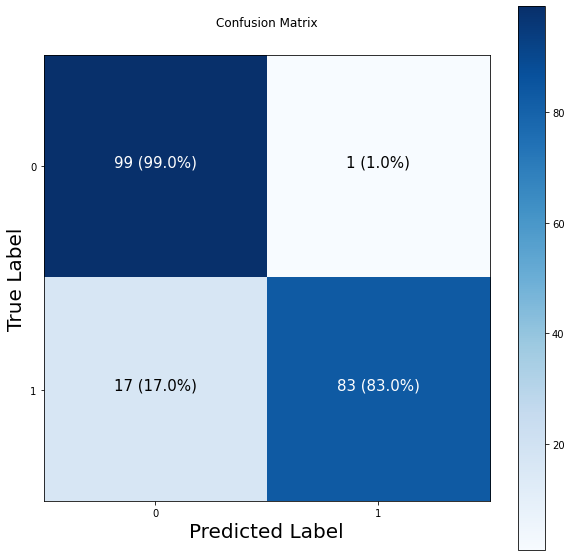

In [ ]:
from six import class_types
import itertools

figsize= (10, 10)

# Create the confusion matrix 
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis =1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax =plt.subplots(figsize = figsize)
#Create matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

# create classes
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title = "Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels =labels,
       yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjusut label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min())/2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j] *100:.1f}%)",
  horizontalalignment ='center',
  color ="white" if cm[i,j] > threshold else "black",
  size = 15)

# Working with a larger example (multiclass classification)

 When you have more than 2 classes as an option, it is known as multiclass classification.  

To practice multi-class classification, we're going to build a neural netowrk to classify images of differnt items of clothing

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for usu
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

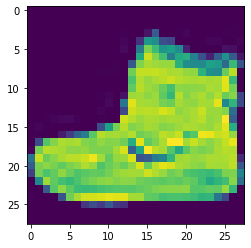

In [ ]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
# Check out samples label
train_labels[0]

9

In [ ]:
# Create a small list so we can index onto our training labels so they're human readable 
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandel", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt')

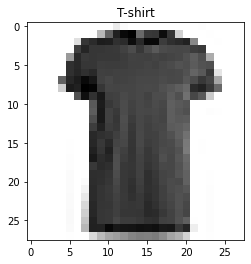

In [ ]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

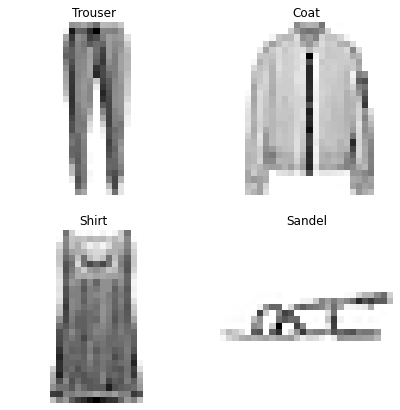

In [ ]:
import random
plt.figure(figsize =(7, 7))
for i in range(4): 
  ax = plt.subplot(2, 2, i+1)
  rand_index =random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Build a multi-class classification model 

For our multi-class classification model, we can use similar architercture to our binary classifier, however we're going to have to modify a few things:
* Input shape = 28 x 28
* Output shape  = 10 
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * if your labels are one hot encoded, we can use CategoricalCrossentropy
  * if they are not, we can use SparseCategoricalCrossEntropy
* Output layer activation = Softmax (not sigmoid)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 =tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28, 28)),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model 
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                 metrics = ['accuracy'])

# Fit the model 
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs = 25,
                                validation_data =(test_data, test_labels))

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3454 - accuracy: 0.1006 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 2/25
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3054 - accuracy: 0.0989 - val_loss: 2.3069 - val_accuracy: 0.1000
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3055 - accuracy: 0.1000 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 4/25
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3053 - accuracy: 0.1008 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3052 - accuracy: 0.0994 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 6/25
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3050 - accuracy: 0.1003 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 7/25
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3053 - accuracy: 0.0996 - val_loss: 2.3043 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 4)                 3140      
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled (or normalized), this means they like to have the numbers in between 0 & 1

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum 
train_data_norm = train_data / 255.0
test_data_norm = test_data / test_data.max()

# Check the min and max values of the scaled training data 
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
from sklearn.utils import validation
# Now our data is normalized, lets build a model 

# set random seed
tf.random.set_seed(42)

# Create a model 
model_12 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28, 28)),
                                tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics  = ['accuracy'])

# Fit the model 
norm_history = model_12.fit(train_data_norm,
                        train_labels, 
                        epochs = 10,
                        validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

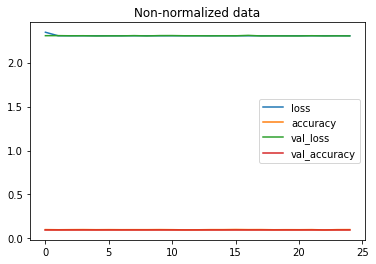

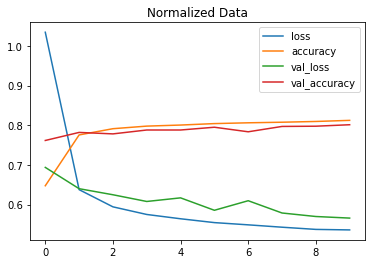

In [ ]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title = "Non-normalized data");
# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title ="Normalized Data");


## Finding the ideal learning rate

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# create model 
model_13 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28, 28)),
                                tf.keras.layers.Dense(4, activation ='relu'),
                                tf.keras.layers.Dense(4, activation ='relu'),
                                tf.keras.layers.Dense(10, activation ='softmax'),
])

# Compile model 
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

# Fit the model 
find_lr_history = model_13.fit(train_data_norm,
                               train_labels, 
                               epochs = 40,
                               validation_data = (test_data_norm, test_labels),
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

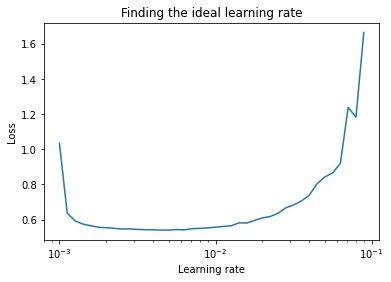

In [ ]:
# Plot the learning rate decay curve
import numpy as np 
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# Let's refit a model with the ideal learning rate

# Set random seed 
tf.random.set_seed(42)

# Create a model
model_14 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape =(28,28)),
                                tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model 
model_14.compile(loss =tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Fit the model 
history_14 = model_14.fit(train_data_norm, 
                          train_labels,
                          epochs = 20,
                          validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

from scipy.sparse.sputils import matrix
## Evaluating our multi-class classification model 

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics such as a confusion matrix
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or chaning the architecture)
* Save and export it for use in an application 

In [ ]:
# Create a confusion matrix 
from six import class_types
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize =(10, 10), text_size =15):


  # Create the confusion matrix 
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis =1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax =plt.subplots(figsize = figsize)
  #Create matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # create classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels =labels,
        yticklabels = labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjusut label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min())/2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j] *100:.1f}%)",
    horizontalalignment ='center',
    color ="white" if cm[i,j] > threshold else "black",
    size = 15)

In [ ]:
# Make some predictions with our model 
y_probs = model_14.predict(test_data_norm)

# Voew the first 5 predictions 

y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

In [ ]:
#Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

In [ ]:
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

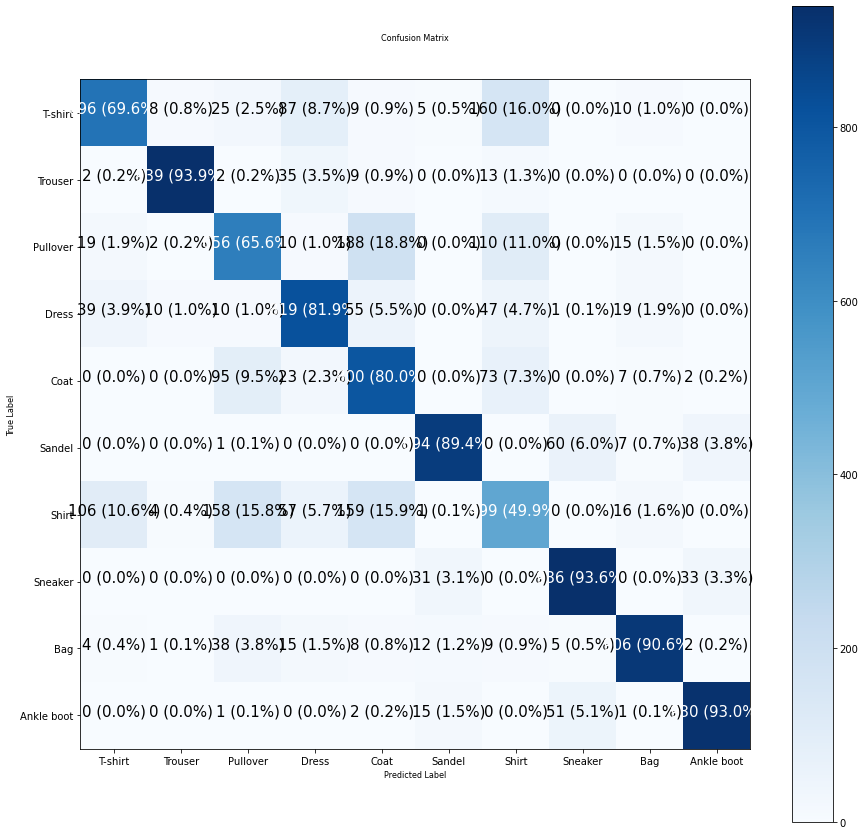

In [ ]:
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (15, 15),
                      text_size = 8)

Let's:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
import random 

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction  and truth label
  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets 
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_image, cmap =plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label :
    color = "green"
  else:
    color = 'red'

  # add xlabel information (prediction /true label)
  plt.xlabel("Pred : {} {:2.0f}% (True : {}".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
             color = color)


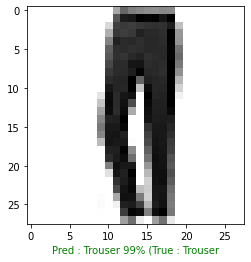

In [ ]:
plot_random_image(model = model_14,
                  images = test_data_norm,
                  true_labels= test_labels,
                  classes =class_names)

# What patterns is our model learning? 

In [ ]:
# Find the layers of our most recent model 
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network 
weights, biases = model_14.layers[1].get_weights()

# SHapes 
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

Now lets check out the bias vector

In [ ]:
# Bias  and biases shapes
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

  Every neuron has a bias vector, each of which is paired with a weights matrix.